In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz, wavedrom
from IPython.display import display, Markdown

In [2]:
inString = [0,0,1,0,0,1,0]

fst = FST()
print(fst.states)
print(fst.transitionFunction)

fst = FST([], 'S0')
print(fst.states)
print(fst.transitionFunction)

fst.addState('S2 new')
print(fst.states)
print(fst.transitionFunction)

fst.addTransition('S0', 0, 'S2 new')
print(fst.transitionFunction)
fst.addTransition('S0', 1, '42')
print(fst.transitionFunction)
fst.addTransition('S2 new', 0, '42')
print(fst.transitionFunction)
print(fst.states)

fstMoore = fst.deepcopy()
fstMoore.setType('Moore')
fstMoore.addTransition('Moore', 1, 'S0')
fstMealy = fst.deepcopy()
fstMealy.setType('Mealy')
fstMealy.addTransition('Mealy', 1, 'S0')

[]
[]
['S0']
[]
['S0', 'S2 new']
[]
[['S0', 0, 'S2 new']]
[['S0', 0, 'S2 new'], ['S0', 1, '42']]
[['S0', 0, 'S2 new'], ['S0', 1, '42'], ['S2 new', 0, '42']]
['42', 'S0', 'S2 new']


True

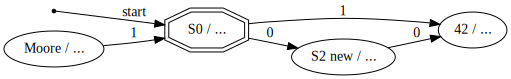

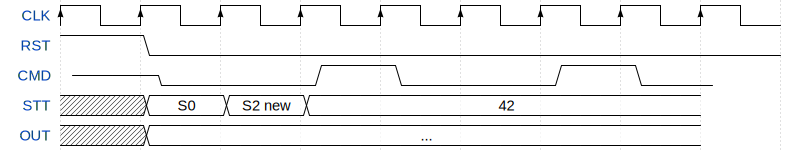

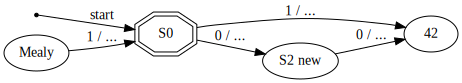

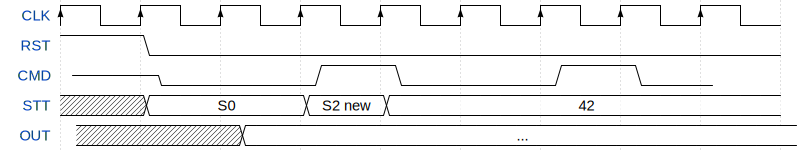

In [3]:
display(graphviz.Source(fstMoore.toDot()))
display(wavedrom.render(fstMoore.playToWave(inString,2,True)))
display(graphviz.Source(fstMealy.toDot()))
display(wavedrom.render(fstMealy.playToWave(inString,2,True)))